In [9]:
#import packages
import numpy as np
import scipy
from scipy.special import comb 
import scipy.stats as sst
import networkx as nx
from random import choice
import matplotlib.pyplot as plt

In [10]:
def f(p,i,n):
  if i == 0:
    p_connect = 0
  if i == 1:
    p_connect = 1
  else:
    sum_f = 0
    for i_n in range(1,i,1):
      sum_f += f(p,i_n,n)*scipy.special.comb(i-1,i_n-1)*(1-p)**((i_n)*(i-i_n))
    p_connect = 1-sum_f
  return p_connect

In [11]:
def g(p,i,n):
  return (1-p)**(i*(n-i))

In [12]:
#calculate P function with input = Pdict (use the pickle.load(open(args.ffile+'.p',"rb")))
# ffile = name of downloaded p values file
def P(p,i,n):
  #print("execute P", p, i, n)
  if i==0 and n==0:
    P_tot = 1
  elif i>0 and n==0:
    P_tot = 0
  elif i > n or n < 0 or i<=0:
    P_tot = 0
  elif i == 1 and n == 1:
    P_tot = 1
  elif i == 1 and n != 1:
    P_tot = (1-p)**scipy.special.comb(n,2)
  else:
    sum_P = 0
    for j in range(0,i+1,1): # shouldn't it be i+1?
      sum_P += P(p,j,n-i)
    P_tot = scipy.special.comb(n,i)*f(p,i,n)*g(p,i,n)*sum_P
  return P_tot

In [13]:
def S(p,n):
  sum = 0
  for k in range(1,n+1):
    sum += P(p,k,n)*k
  return sum

In [14]:
def S_calc_data(p=.1,n=[20,50,100]):
  x_array = np.zeros(len(n))
  y_array = np.zeros(len(n))
  for a in range(len(n)):
    x_array[a] = n[a]
  for b in range(len(n)):
    y_array[b] = S(p,n[b])
  return x_array, y_array

In [15]:
def simulated_rlcc(p,n): #n = #nodes, m = #edges
  g = nx.erdos_renyi_graph(n, p, seed=None, directed=False) 
  if(g.number_of_nodes() == 0):
    return 0
  else:
    nodes_in_cluster = len(max(nx.connected_components(g), key=len))
    return nodes_in_cluster
  #   / g.number_of_nodes()

In [16]:
def S_simulation_data_1(p=.1,n=[20,50,100]):
  x_array = np.zeros(len(n))
  y_array = np.zeros(len(n))
  for a in range(len(n)):
    x_array[a] = n[a]
  for b in range(len(n)):
    y_array[b] = simulated_rlcc(p,n[b])
  return x_array, y_array

In [17]:
def S_simulation_data(p=.1,n=[20,50,100],ntrials=100):
  tot_x = np.zeros(len(n))
  tot_y = np.zeros(len(n))
  for i in range(ntrials):
    x_array = np.zeros(len(n))
    y_array = np.zeros(len(n))
    for a in range(len(n)):
      x_array[a] = n[a]
    for b in range(len(n)):
      y_array[b] = simulated_rlcc(p,n[b])
    tot_x = tot_x + x_array
    tot_y = tot_y + y_array
  tot_x = tot_x/ntrials
  tot_y = tot_y/ntrials
  return tot_x, tot_y

In [18]:
def my_lambertw(x, k=0):
  if x+1/np.exp(1)<1E-20:
    return -1.0
  else:
    return scipy.special.lambertw(x, k=k)


def perf_sim2copy(p=.1,n=[20,50,100], smoothing = False):
  print(n)
  y_array = np.zeros(len(n))
  x_array = np.zeros(len(n))

  for i in range(len(n)):
    c = 2 * p * scipy.special.comb(n[i], 2) / n[i]
    #percolation_threshold2 = 1/n + (n-1)/(c_init*n)]
    x_array[i] = n[i]

    if smoothing == True:
      y_array[i] = 1 + my_lambertw(-c*np.exp(-c))/c + 1/n
    else:
      y_array[i] = (1 + my_lambertw(-c*np.exp(-c))/c) * n[i]

  return x_array, y_array

In [19]:
def plot_S(p=.1,n=[20,50,100],ntrials=100):
  simulated = S_simulation_data(p,n,ntrials)
  calculated = S_calc_data(p,n)
  lambert = perf_sim2copy(p,n,smoothing=False)
  plt.plot(simulated[0],simulated[1], label = "simulated")
  plt.plot(calculated[0], calculated[1], label = "calculated")
  plt.plot(lambert[0], lambert[1], label = "lambert")
  plt.legend()

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


C:\Users\jj\AppData\Local\Temp\ipykernel_9892\2178723426.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  y_array[i] = (1 + my_lambertw(-c*np.exp(-c))/c) * n[i]


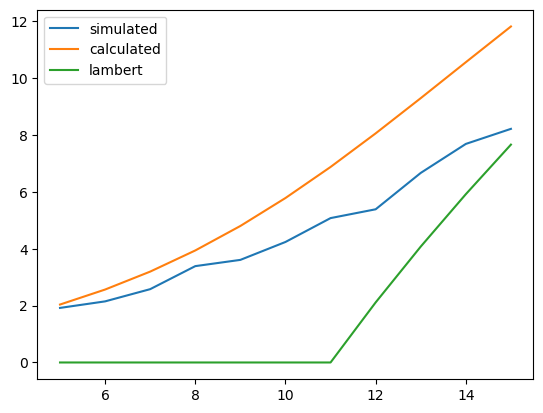

In [20]:
plot_S(p=.1,n=[5,6,7,8,9,10,11,12,13,14,15])